In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("datasets/barcelona/accidents_2017.csv")

In [15]:
weekdaysData = df.Weekday.value_counts()

weekdaysDf = {"Accidents" : weekdaysData}
weekdaysDf = pd.DataFrame(weekdaysDf)

weekdaysDf

,Accidents
Friday,1761
Tuesday,1691
Thursday,1677
Wednesday,1650
Monday,1510
Saturday,1155
Sunday,895


In [16]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter, range(len(sorter))))

weekdaysDf['Day_id'] = weekdaysDf.index
weekdaysDf['Day_id'] = weekdaysDf['Day_id'].map(sorterIndex)
weekdaysDf.sort_values('Day_id', inplace=True)

weekdaysDf = weekdaysDf.drop("Day_id", axis=1)

weekdaysDf

,Accidents
Monday,1510
Tuesday,1691
Wednesday,1650
Thursday,1677
Friday,1761
Saturday,1155
Sunday,895


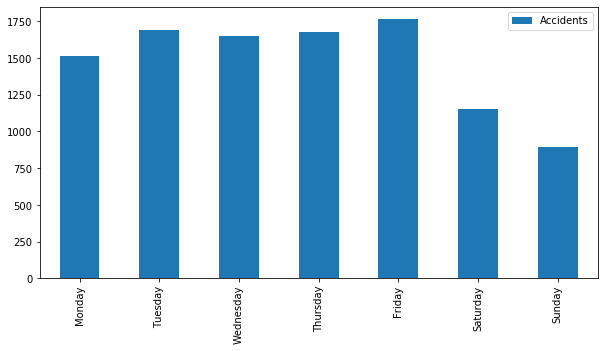

In [17]:
weekdaysDf.plot(kind='bar', figsize=(10, 5))
plt.show()